# Alter data in CSV files

In [10]:
import pandas as pd
import requests
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
cantons = ["zuerich", "bern", "luzern", "uri", "schwyz", "obwalden", "nidwalden", "glarus", "zug", "freiburg", 
           "solothurn", "basel-stadt", "basel-landschaft", "schaffhausen", "appenzell-ai", 
           "appenzell-ar", "st-gallen", "graubuenden", "aargau", "thurgau", "tessin", "waadt", "wallis", 
           "neuenburg", "genf", "jura"]

In [60]:
canton = "solothurn"
print(canton)
filename = f"{canton}.csv"
df = pd.read_csv(filename)

# Extract the first column as a list
first_col = df.iloc[:, 0].tolist()

# Separate each value in the list using the specified rules
separated_values = []
for i, value in enumerate(first_col):
    #print(str(i))
    parts = [i]  # add index as the first entry
    current_part = ""
    if isinstance(value, str):
        for char in value:
            if char == ",":
                if current_part != "":
                    parts.append(int(current_part))
                    current_part = ""
            elif char == " ":
                continue
            else:
                current_part += char
        if current_part != "":
            parts.append(int(current_part))
        elif len(parts) < 3:  # add a 0 if the entry has no value
            parts.append(0)
        separated_values.append(parts)
    else: continue

# Check each row and modify the values as needed
for i, values in enumerate(separated_values):
    if len(values) >= 3 and values[2] < 10:
        combined_value = float(f"{values[1]}.{values[2]}")
        separated_values[i] = [values[0], combined_value] + values[3:]
    elif len(values) >= 2 and values[1] < 25:
        float_value = float(values[1])
        separated_values[i] = [values[0], float_value] + values[2:]

# Remove any row that has less than 4 entries
separated_values = [row for row in separated_values if len(row) >= 4]

new_df = pd.DataFrame(separated_values, columns=["Index", "Rooms", "Footage", "Rent"])
#new_df["Canton"] = canton  # add a column for the canton

new_col1 = df.loc[:,"header"]
new_col2 = df.loc[:,"header"]
new_col3 = df.loc[:,"header"]

# Insert the new columns at the beginning of the dataframe
df.insert(1, 'Rent', new_col3)
df.insert(1, 'Footage', new_col2)
df.insert(1, 'Rooms', new_col1)
df = df.drop("header",axis=1)

length = len(df.loc[:,'Rooms'])
for i in range(length):
    #print(str(i))
    if i in new_df['Index'].values:
        index = new_df.index[new_df['Index'] == i][0]
        #print(str(index))
        df.loc[i,"Rooms"]=new_df.loc[index,"Rooms"]
        df.loc[i,"Footage"]=new_df.loc[index,"Footage"]
        df.loc[i,"Rent"]=new_df.loc[index,"Rent"]
    else:
        df.loc[i,"Rooms"]=0
        df.loc[i,"Footage"]=0
        df.loc[i,"Rent"]=0

for i in range(length):
    if df.loc[i,"Rooms"]==0:
        df = df.drop(i)

df = df.reset_index(drop=True)
# Split the address column into street, city, and canton columns
df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)

# Strip whitespace from the new columns
df['street'] = df['street'].str.strip()
df['city'] = df['city'].str.strip()
df['canton'] = df['canton'].str.strip()

# Remove trailing "," from the new columns
df['street'] = df['street'].str.replace(r',$', '')
df['city'] = df['city'].str.replace(r',$', '')
df['canton'] = df['canton'].str.replace(r',$', '')

# Move data to the right if the canton column is empty
mask = df['canton'].isnull()
df.loc[mask, 'canton'] = df['city']
df.loc[mask, 'city'] = df['street']
df.loc[mask, 'street'] = ''
print(df)
filename = f"{canton}_new.csv"
df.to_csv(filename, index=False)

solothurn
    Rooms Footage  Rent                                      address  \
0     4.5     117  2075     Dorfstrasse 82, 4612 Wangen b. Olten, SO   
1     4.5     102  1830      Egerkingerstrasse 1, 4624 Härkingen, SO   
2     3.5      67  1630  Spiegelbergstrasse 14, 4552 Derendingen, SO   
3     3.5      90  1785      Steinenbachweg 30/32, 4710 Balsthal, SO   
4     2.5      61  1345      Steinenbachweg 30/32, 4710 Balsthal, SO   
..    ...     ...   ...                                          ...   
711   2.5      70  1250          Schmittengasse 4, 2544 Bettlach, SO   
712   2.5      51  1100            Hintere Gasse 2, 4628 Wolfwil, SO   
713   3.5      80  1440    Waldstrasse 14e, 4564 Obergerlafingen, SO   
714   4.5      80  1440        Thalstrasse 553, 4712 Laupersdorf, SO   
715   3.5     125  2050        Mühlegasse 24, 4613 Rickenbach SO, SO   

                                                 title  \
0    «Ihr neues Zuhause: Ankommen und wohlfühlen, b...   
1    «hel

/tmp/ipykernel_5205/30936395.py:77: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_5205/30936395.py:85: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_5205/30936395.py:86: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_5205/30936395.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


In [5]:
df_combined = []
for canton in cantons:
    #canton = "nidwalden"
    print(canton)
    filename = f"{canton}.csv"
    df = pd.read_csv(filename)

    # Extract the first column as a list
    first_col = df.iloc[:, 0].tolist()

    # Separate each value in the list using the specified rules
    separated_values = []
    for i, value in enumerate(first_col):
        #print(str(i))
        parts = [i]  # add index as the first entry
        current_part = ""
        if isinstance(value, str):
            for char in value:
                if char == ",":
                    if current_part != "":
                        parts.append(int(current_part))
                        current_part = ""
                elif char == " ":
                    continue
                else:
                    current_part += char
            if current_part != "":
                parts.append(int(current_part))
            elif len(parts) < 3:  # add a 0 if the entry has no value
                parts.append(0)
            separated_values.append(parts)
        else: continue
            
    # Check each row and modify the values as needed
    for i, values in enumerate(separated_values):
        if len(values) >= 3 and values[2] < 10:
            combined_value = float(f"{values[1]}.{values[2]}")
            separated_values[i] = [values[0], combined_value] + values[3:]
        elif len(values) >= 2 and values[1] < 25:
            float_value = float(values[1])
            separated_values[i] = [values[0], float_value] + values[2:]

    # Remove any row that has less than 4 entries
    separated_values = [row for row in separated_values if len(row) >= 4]

    new_df = pd.DataFrame(separated_values, columns=["Index", "Rooms", "Footage", "Rent"])
    #new_df["Canton"] = canton  # add a column for the canton

    new_col1 = df.loc[:,"header"]
    new_col2 = df.loc[:,"header"]
    new_col3 = df.loc[:,"header"]

    # Insert the new columns at the beginning of the dataframe
    df.insert(1, 'Rent', new_col3)
    df.insert(1, 'Footage', new_col2)
    df.insert(1, 'Rooms', new_col1)
    df = df.drop("header",axis=1)

    length = len(df.loc[:,'Rooms'])
    for i in range(length):
        #print(str(i))
        if i in new_df['Index'].values:
            index = new_df.index[new_df['Index'] == i][0]
            #print(str(index))
            df.loc[i,"Rooms"]=new_df.loc[index,"Rooms"]
            df.loc[i,"Footage"]=new_df.loc[index,"Footage"]
            df.loc[i,"Rent"]=new_df.loc[index,"Rent"]
        else:
            df.loc[i,"Rooms"]=0
            df.loc[i,"Footage"]=0
            df.loc[i,"Rent"]=0

    for i in range(length):
        if df.loc[i,"Rooms"]==0:
            df = df.drop(i)

    df = df.reset_index(drop=True)
    # Split the address column into street, city, and canton columns
    df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)

    # Strip whitespace from the new columns
    df['street'] = df['street'].str.strip()
    df['city'] = df['city'].str.strip()
    df['canton'] = df['canton'].str.strip()

    # Remove trailing "," from the new columns
    df['street'] = df['street'].str.replace(r',$', '')
    df['city'] = df['city'].str.replace(r',$', '')
    df['canton'] = df['canton'].str.replace(r',$', '')

    # Move data to the right if the canton column is empty
    mask = df['canton'].isnull()
    df.loc[mask, 'canton'] = df['city']
    df.loc[mask, 'city'] = df['street']
    df.loc[mask, 'street'] = ''
    
    df_combined.append(df)
    #print(df)
# Concatenate all the DataFrames into a single DataFrame
df_combined_swiss = pd.concat(df_combined, ignore_index=True)
df_combined_swiss.to_csv("swiss.csv", index=False)
 

zuerich


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


bern


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


luzern


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'can

uri
schwyz
obwalden
nidwalden
glarus


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'can

zug
freiburg


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


solothurn


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


basel-stadt


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


basel-landschaft


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'can

schaffhausen
appenzell-ai
appenzell-ar


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


st-gallen


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'can

graubuenden
aargau


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


thurgau


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


tessin


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


waadt


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


wallis


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


neuenburg


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


genf


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


jura


/tmp/ipykernel_262/1525886014.py:79: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['street', 'city', 'canton']] = df['address'].str.split(',', 2, expand=True)
/tmp/ipykernel_262/1525886014.py:87: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street'] = df['street'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:88: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace(r',$', '')
/tmp/ipykernel_262/1525886014.py:89: FutureWarning: The default value of regex will change from True to False in a future version.
  df['canton'] = df['canton'].str.replace(r',$', '')


In [6]:
# Set the base URL for the Overpass API
base_url = "https://nominatim.openstreetmap.org/search"
headers = headers = ({'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'})

In [7]:
cantons = ["zuerich", "bern", "luzern", "uri", "schwyz", "obwalden", "nidwalden", "glarus", "zug", "freiburg", 
           "solothurn", "basel-stadt", "basel-landschaft", "schaffhausen", "appenzell-ai", 
           "appenzell-ar", "st-gallen", "graubuenden", "aargau", "thurgau", "tessin", "waadt", "wallis", 
           "neuenburg", "genf", "jura"]

In [8]:
# Function to get latitude and longitude for a given address
def get_lat_lng(address):
    try:
        params = {"q": address, "format": "json"}
        response = requests.get(base_url, params=params, headers=headers)
        data = response.json()
        if data:
            lat = float(data[0]['lat'])
            lng = float(data[0]['lon'])
            return lat, lng
        else:
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

In [9]:
def get_lat_lng_from_city(city_postalcode):
    try:
        city, postalcode = city_postalcode.split()
        params = {"q": f"{city} {postalcode}", "format": "json"}
        response = requests.get(base_url, params=params, headers=headers)
        data = response.json()
        if data:
            lat = float(data[0]['lat'])
            lng = float(data[0]['lon'])
            return lat, lng
        else:
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

In [10]:
# Add new columns for latitude and longitude
df["Latitude"] = None
df["Longitude"] = None

In [11]:
lat, lng= get_lat_lng("Allmendstrasse 2, 8952 Schlieren")
print(lat)

47.3980786


In [12]:
lat, lng= get_lat_lng_from_city("8952 Schlieren")
print(lat)

47.3965147


In [13]:
# Iterate through the dataframe and update the latitude and longitude columns
def update_lat_lng(df):
    # Create columns for the address and city coordinates
    df['Address_Latitude'] = ''
    df['Address_Longitude'] = ''
    df['City_Latitude'] = ''
    df['City_Longitude'] = ''

    # Iterate through the dataframe and update the latitude and longitude columns
    for index, row in df.iterrows():
        address = row["address"]
        city = row["city"]
        address_lat, address_lng = get_lat_lng(address)
        time.sleep(1)
        city_lat, city_lng = get_lat_lng(city)
        df.at[index, "Address_Latitude"] = address_lat
        df.at[index, "Address_Longitude"] = address_lng
        df.at[index, "City_Latitude"] = city_lat
        df.at[index, "City_Longitude"] = city_lng
        if index % 100 == 0:
            print(f"Processed {index} rows")
        time.sleep(1)


In [14]:
filename = "swiss.csv"
df = pd.read_csv(filename)
update_lat_lng(df)

Processed 0 rows
Processed 100 rows
Processed 200 rows
Processed 300 rows
Processed 400 rows
Processed 500 rows
Processed 600 rows
Processed 700 rows
Processed 800 rows
Processed 900 rows
Processed 1000 rows
Processed 1100 rows
Processed 1200 rows
Processed 1300 rows
Processed 1400 rows
Processed 1500 rows
Processed 1600 rows
Processed 1700 rows
Processed 1800 rows
Processed 1900 rows
Processed 2000 rows
Processed 2100 rows
Processed 2200 rows
Processed 2300 rows
Processed 2400 rows
Processed 2500 rows
Processed 2600 rows
Processed 2700 rows
Processed 2800 rows
Processed 2900 rows
Processed 3000 rows
Processed 3100 rows
Processed 3200 rows
Processed 3300 rows
Processed 3400 rows
Processed 3500 rows
Processed 3600 rows
Processed 3700 rows
Processed 3800 rows
Processed 3900 rows
Processed 4000 rows
Processed 4100 rows
Processed 4200 rows
Processed 4300 rows
Processed 4400 rows
Processed 4500 rows
Processed 4600 rows
Processed 4700 rows
Processed 4800 rows
Processed 4900 rows
Processed 50

In [15]:
# Save the updated dataframe to a new CSV file
df.to_csv("swiss_with_coordinates.csv", index=False)

In [24]:
# Read the CSV file
df = pd.read_csv("swiss_with_coordinates.csv")

In [25]:
df.describe()

,Rooms,Footage,Rent,Address_Latitude,Address_Longitude,City_Latitude,City_Longitude
count,10139.00000,10139.000000,1.013900e+04,9478.000000,9478.000000,10115.000000,10115.000000
mean,3.42302,95.872571,2.267562e+03,47.085675,7.862498,46.971786,7.919517
std,1.29848,775.339133,2.732679e+04,0.487256,1.249308,2.422597,4.226185
min,1.00000,1.000000,1.000000e+00,38.474290,-76.506342,-37.818240,-109.364284
25%,2.50000,61.000000,1.360000e+03,46.810471,7.248219,46.805566,7.208757
50%,3.50000,80.000000,1.700000e+03,47.242041,7.625953,47.213457,7.623194
75%,4.50000,102.000000,2.200000e+03,47.468526,8.594205,47.462265,8.595382
max,16.00000,75100.000000,2.750000e+06,47.791305,10.405013,61.632159,144.952581


In [11]:
# Read the CSV file
df = pd.read_csv("swiss_no_outliers_and_cleaned.csv")

In [26]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

In [27]:
df['Distance_to_City_Center(km)'] = df.apply(
    lambda row: haversine(
        row['Address_Latitude'], row['Address_Longitude'],
        row['City_Latitude'], row['City_Longitude']
    ), axis=1
)


In [28]:
# Drop rows with missing values in the specified columns
df = df.dropna(subset=["Rooms", "Footage", "Rent", "address","Distance_to_City_Center(km)","Address_Latitude","Address_Longitude","City_Latitude","City_Longitude"])
# Drop duplicates
df = df.drop_duplicates()

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers in the specified columns
df = remove_outliers(df, "Rooms")
df = remove_outliers(df, "Footage")
df = remove_outliers(df, "Rent")

# Save the dataframe without outliers to a new CSV file
df.to_csv("swiss_no_outliers_and_cleaned.csv", index=False)

In [29]:
df.describe()

,Rooms,Footage,Rent,Address_Latitude,Address_Longitude,City_Latitude,City_Longitude,Distance_to_City_Center(km)
count,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000
mean,3.264006,78.518496,1703.728441,47.104518,7.882657,47.044088,7.931285,14.974485
std,1.098216,28.826408,542.821407,0.476806,1.272027,1.847595,3.162927,317.282638
min,1.000000,1.000000,250.000000,38.474290,-76.506342,-25.457311,-91.153628,0.000000
25%,2.500000,60.000000,1330.000000,46.838433,7.274682,46.833144,7.247401,0.324180
50%,3.500000,78.000000,1645.000000,47.257758,7.622726,47.257562,7.623194,0.662625
75%,4.000000,97.000000,2000.000000,47.476422,8.620561,47.477416,8.629913,1.197390
max,7.500000,161.000000,3260.000000,47.791305,10.405013,49.884093,135.497978,10148.539050


In [5]:
df.head

<bound method NDFrame.head of       Rooms  Footage  Rent                                     address  \
0       5.5      150  2480        Hofackerstrasse 6, 8444 Henggart, ZH   
1       3.5       63  1740              Schmittegass 11, 8197 Rafz, ZH   
2       3.5      104  2270     Zürcherstrasse 163, 8406 Winterthur, ZH   
3       3.5       83  2290      Usterstrasse 125, 8620 Wetzikon ZH, ZH   
4       2.5       57  1580         Mörlerstrasse 22, 8248 Uhwiesen, ZH   
...     ...      ...   ...                                         ...   
8742    4.5       98  1550                        2340 Le Noirmont, JU   
8743    3.0       80  1500                         2900 Porrentruy, JU   
8744    3.5       75  1275             Rue du soleil, 2907 Rocourt, JU   
8745    3.5       65   975    Rue Saint-Germain 3, 2853 Courfaivre, JU   
8746    3.5       71   980  Route de Fontenais 31, 2900 Porrentruy, JU   

                                                  title  \
0     «Tolle 5.5-Zimme

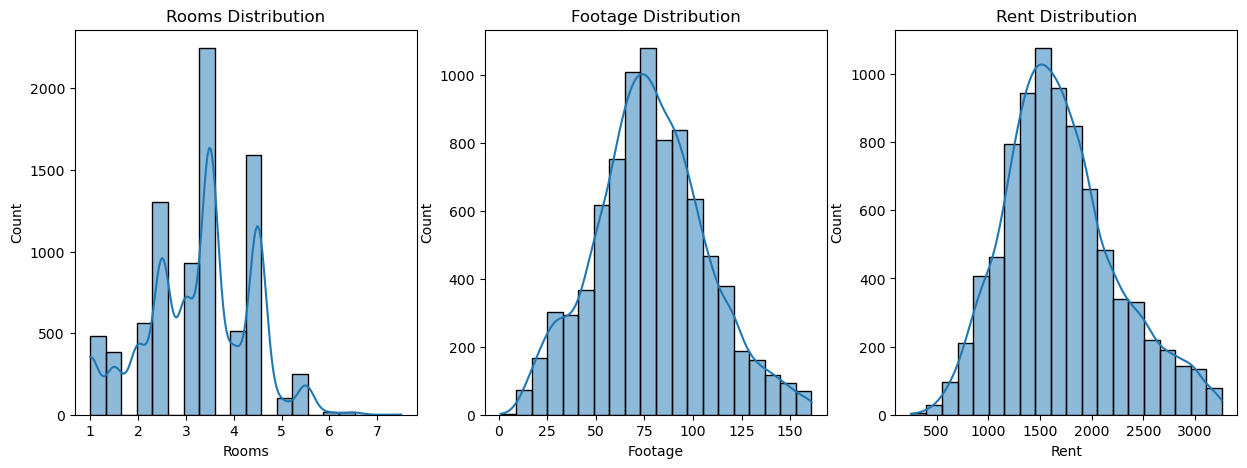

In [30]:
#Visualize the distribution of the "Rooms", "Footage", and "Rent" columns using histograms:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df["Rooms"], kde=True, bins=20)
plt.title("Rooms Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df["Footage"], kde=True, bins=20)
plt.title("Footage Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df["Rent"], kde=True, bins=20)
plt.title("Rent Distribution")

plt.show()

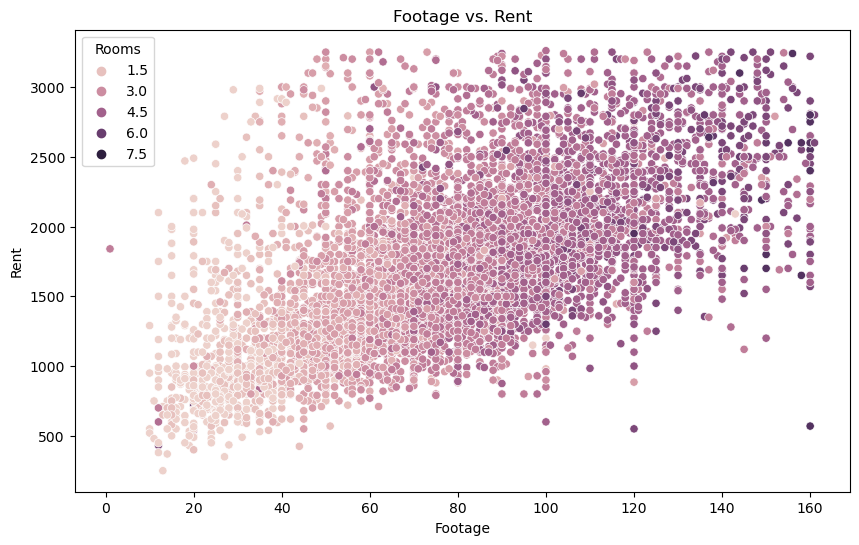

In [31]:
#Visualize the relationship between "Footage" and "Rent" using a scatterplot:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Footage", y="Rent", data=df, hue="Rooms")
plt.title("Footage vs. Rent")
plt.show()

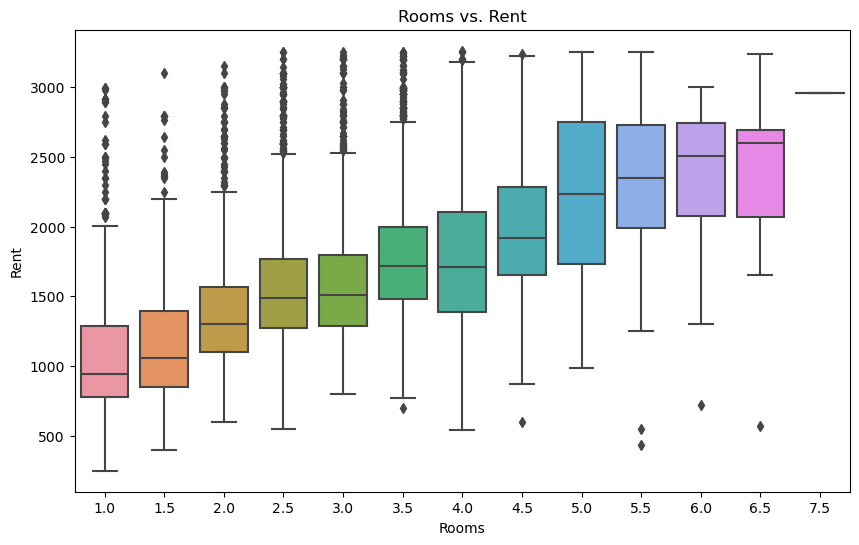

In [32]:
#Visualize the relationship between "Rooms" and "Rent" using a boxplot:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Rooms", y="Rent", data=df)
plt.title("Rooms vs. Rent")
plt.show()

/tmp/ipykernel_128/1702240022.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


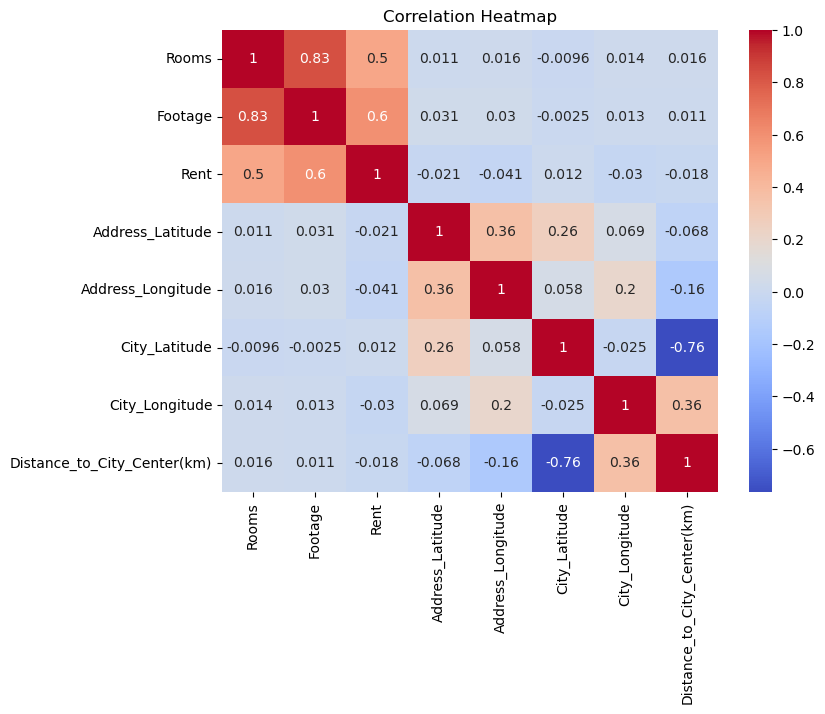

In [33]:
#Create a heatmap to visualize the correlation between numeric columns:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_128/1942364375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


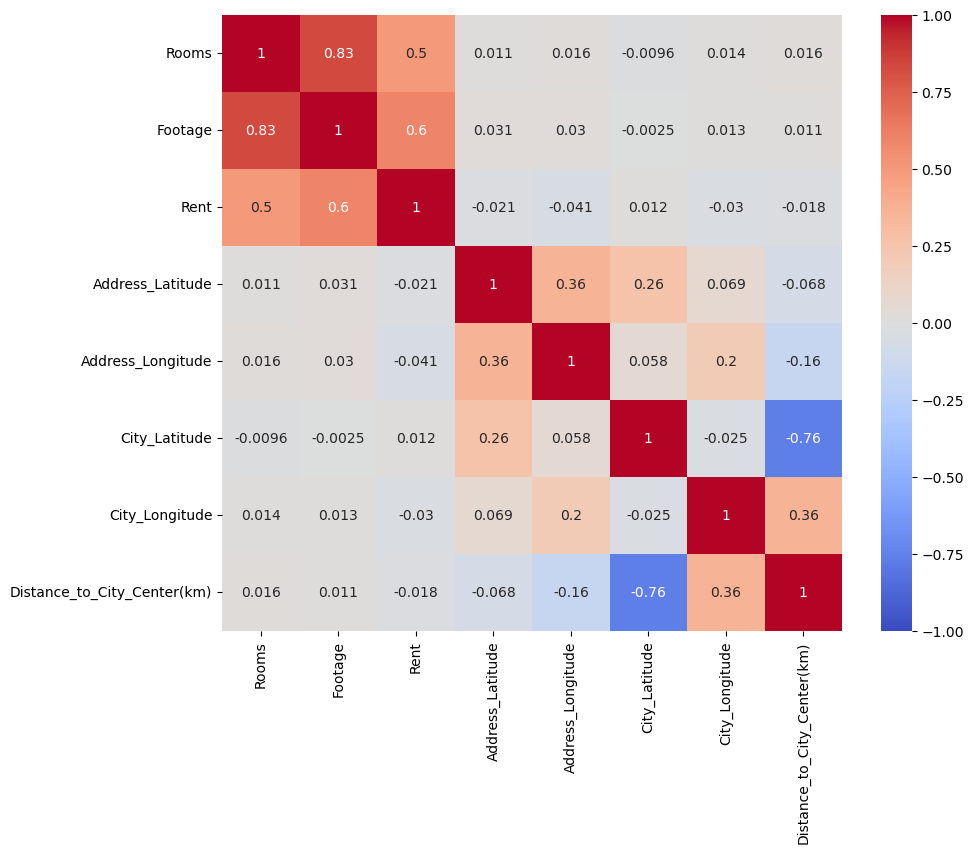

In [34]:
# Correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
